In [1]:
from primordialpy.background import Background
from primordialpy.model import PotentialFunction
from primordialpy.perturbations import  Perturbations
from primordialpy.pbhabundance import PBHAbundance

import matplotlib.pyplot as plt

# Model II: Modulated Chaotic Inflation Potentials. See section 3.2 from
 https://arxiv.org/pdf/1805.09483

In [2]:
V = 'V0*(tanh(phi/sqrt(6)) + A*sin(tanh(phi/sqrt(6))/f))**2'
paramters = {'V0': 2e-10, 'A': 0.130383, 'f': 0.129576}
potential = PotentialFunction.from_string(V, param_values=paramters)

In [3]:
#Instancia de la clase background
background = Background(potential, phi0 = 6.2) 
sol = background.solver()

In [4]:
#Extrayendo datos de la clase background

vars = ['N', 'phi', 'dphidN', 'H', 'a', 'aH', 'eps_H', 'eta_H']
N, phi, dphidN, H, a, aH, eps_H, eta_H = (background.data(save=True)[i] for i in vars)

Figure saved as: figures/potential.png


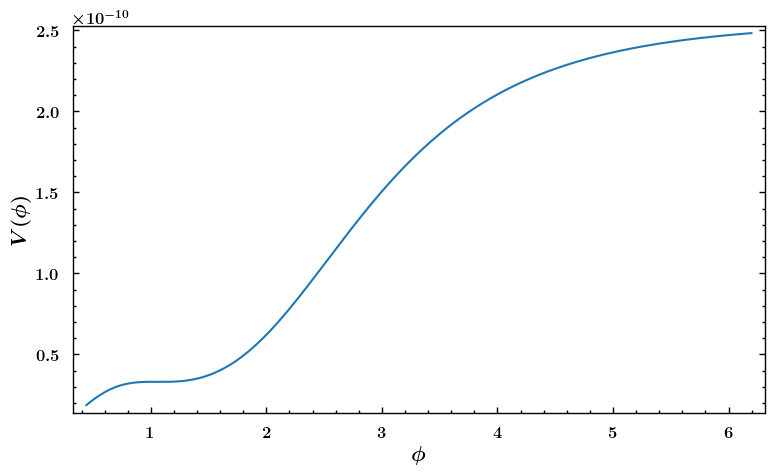

In [5]:
potential.plot_potential(min(phi), max(phi), dpi= 100, save = True)

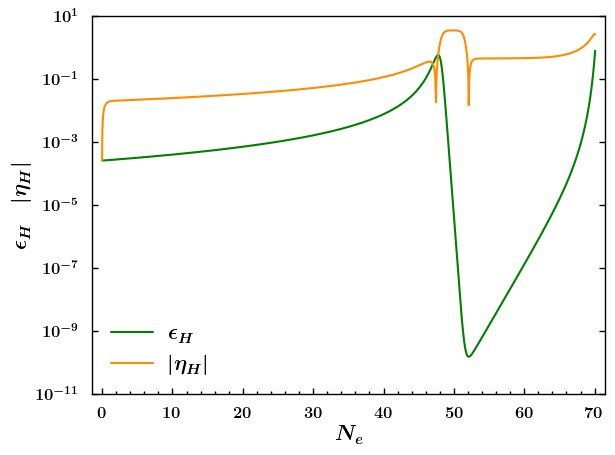

In [6]:
plt.plot(N, eps_H, label = r'$\epsilon_H$', color = 'green' )
plt.plot(N, abs(eta_H), label = r'$|\eta_H |$', color = 'darkorange')

plt.ylim(1e-11, 1e1)
plt.yscale('log')
plt.xlabel(r'$N_e$')
plt.ylabel(r'$\epsilon_H\quad |\eta_H|$')
plt.legend(loc = 3)
#plt.title('Slow-roll parameters')
plt.tight_layout()


In [7]:
pert = Perturbations(potential, background, scale= 'PBH', N_CMB = 55.)
sol_pivot = pert.Power_spectra_pivot()

Curvature power spectrum at pivot scale is 2.0957010497660117e-09
Tensor to scalar ratio at pivot scale is 0.007854047374912588


In [8]:
PS = pert.Power_spectrum(save = True)

Computing P(k): 100%|██████████| 1000/1000 [01:20<00:00, 12.49it/s]


k_peak = 1.89\times 10^{+13} Mpc^-1
N_peak = 49.64384021071853
P_s(k_peak) = 0.018265818577485177
Figure saved as: Figures/spectrum_scalar.png


<Figure size 800x500 with 0 Axes>

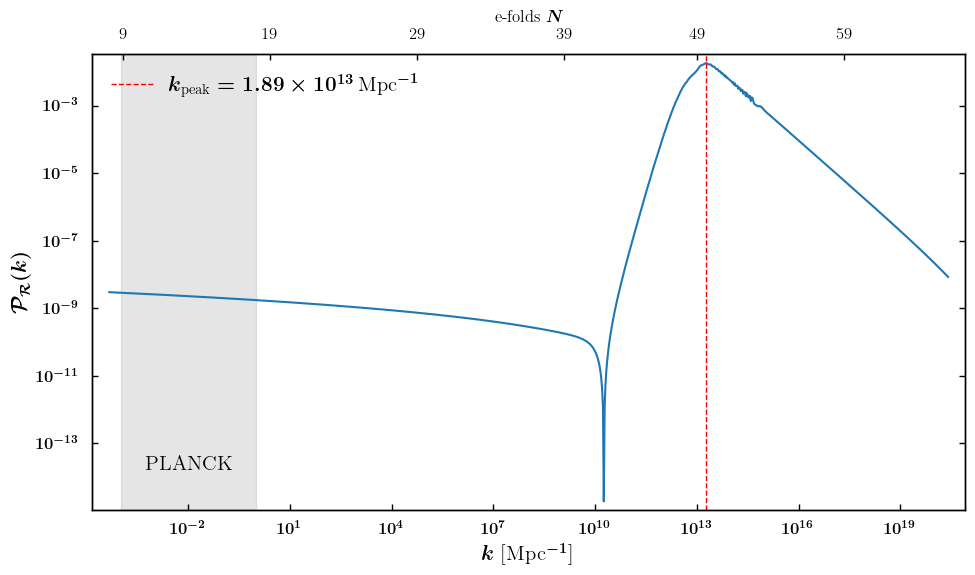

In [9]:
pert.Plot_spectrum(dpi = 100, spectrum = 'scalar', save= True)

In [10]:
print(pert.Spectral_tilts)


{'n_s': 0.9428485706132791, 'n_t': -0.0012985699765478754}


## PBH Abundance after re-entry horizon in RD era

In [11]:
pbh = PBHAbundance(pert, delta_c=0.325, gamma=0.2, gstar=107.5)
mPBH, fPBH = pbh.fPBH(save= True)

fPBH_peak = 0.16387261705860492
MPBH_peak = 9.854955870204808e-15 M⊙


(1e-20, 10000.0)

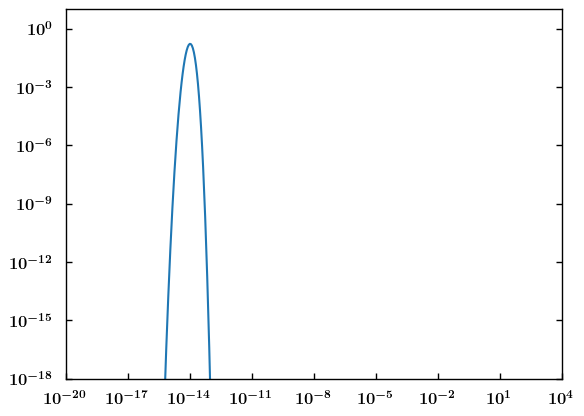

In [12]:
plt.loglog(mPBH, fPBH)
plt.ylim(1e-18, 1e1)
plt.xlim(1e-20, 1e4)
